# Deteksi Gagal Jantung

### Masalah
Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor satu di dunia, yang menyebabkan 17.9 juta kematian setiap tahun, atau 32% dari total kematian global. Gagal jantung adalah salah satu kejadian umum yang disebabkan oleh CVD. Orang yang memiliki penyakit kardiovaskular atau berisiko tinggi terhadap penyakit ini (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dini dan pengelolaan yang tepat, di mana model machine learning dapat sangat membantu. dengan demikin, notebook ini berupaya mengotomatisasi masalah ini untuk mengatasinya dan berfokus pada masalah berikutnya dengan bantuan AI.

### Tujuan
Untuk mengklasifikasikan atau memprediksi apakah seorang pasien rentan terhadap gagal jantung berdasarkan berbagai atribut.

### Atribut Dataset
- **Age**: Usia pasien dalam tahun
- **Sex**: Jenis kelamin [M: Laki-laki, F: Perempuan]
- **ChestPainType**: Jenis nyeri dada [TA: Angina Tipikal, ATA: Angina Atipikal, NAP: Nyeri Non-Anginal, ASY: Asimptomatik]
- **RestingBP**: Tekanan darah saat istirahat [mmHg]
- **Cholesterol**: Kolesterol serum [mg/dl]
- **FastingBS**: Gula darah puasa [1: jika FastingBS > 120 mg/dl, 0: jika tidak]
- **RestingECG**: Hasil elektrokardiogram saat istirahat [Normal: Normal, ST: memiliki kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV), LVH: menunjukkan hipertrofi ventrikel kiri menurut kriteria Estes]
- **MaxHR**: Denyut jantung maksimum yang dicapai [Nilai numerik antara 60 dan 202]
- **ExerciseAngina**: Angina yang diinduksi oleh olahraga [Y: Ya, N: Tidak]
- **Oldpeak**: Oldpeak = ST [Nilai numerik yang diukur dalam depresi]
- **ST_Slope**: Kemiringan segmen ST saat latihan [Up: menanjak, Flat: datar, Down: menurun]
- **HeartDisease**: Kelas output [1: penyakit jantung, 0: Normal]

Import library yang diperlukan:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

***
## Data Gathering
***

In [2]:
data = pd.read_csv("../dataset/heart.csv")
data.shape

(918, 12)

In [3]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N     0.00       Up             0  
1              N     1.00     Flat             1  
2              N     0.00       Up             0  
3              Y     1.50     Flat             1  
4              N     0.00       Up             0

In [4]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<Axes: >

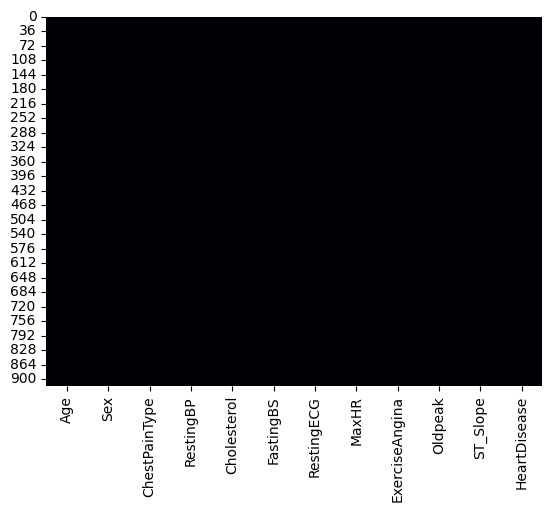

In [6]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False)

**Tidak ada** nilai null dalam data.

In [7]:
data.describe().T

count   mean    std   min    25%    50%    75%    max
Age          918.00  53.51   9.43 28.00  47.00  54.00  60.00  77.00
RestingBP    918.00 132.40  18.51  0.00 120.00 130.00 140.00 200.00
Cholesterol  918.00 198.80 109.38  0.00 173.25 223.00 267.00 603.00
FastingBS    918.00   0.23   0.42  0.00   0.00   0.00   0.00   1.00
MaxHR        918.00 136.81  25.46 60.00 120.00 138.00 156.00 202.00
Oldpeak      918.00   0.89   1.07 -2.60   0.00   0.60   1.50   6.20
HeartDisease 918.00   0.55   0.50  0.00   0.00   1.00   1.00   1.00

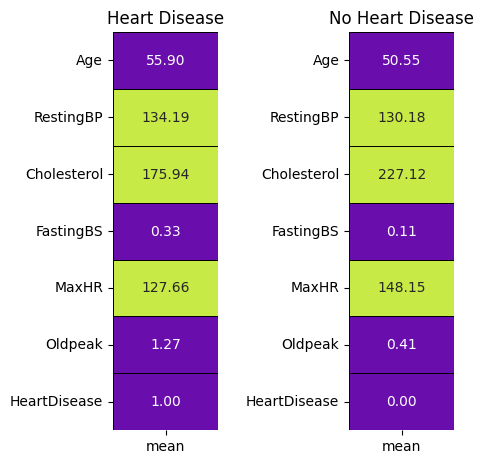

In [8]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#6A0DAD', '#C7EA46']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (5, 5))
plt.subplot(1, 2, 1)
sns.heatmap(yes[['mean']], annot = True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f',)
plt.title('Heart Disease')

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease')

fig.tight_layout(pad=2)

Rata-rata nilai dari semua fitur untuk kasus penyakit jantung dan non-penyakit jantung.

***
## Exploratory Data Analysis
***

Pisahkan fitur menjadi fitur kategorikal dan fitur numerikal, hal ini bertujuan agar kita dapat menerapkan fitur preprocessing yang sesuai untuk setiap jenis fitur, sehingga model dapat mempelajari data dengan lebih efektif dan menghasilkan prediksi yang lebih akurat

In [9]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features: ', *categorical_features)
print('Numerical Features: ', *numerical_features)


Categorical Features:  Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features:  Age RestingBP Cholesterol MaxHR Oldpeak


Fitur kategorikal:

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

Membuat salinan dari dataset dan melakukan encoding label data teks dari fitur kategorikal, hal ini dilakukan untuk kepentingan visualisasi dan agar data teks berubah menjadi format numerik yang dapat diproses oleh algoritma machine learning.

Distribusi fitur kategorikal:

Text(0.5, 1.0, 'Distribution : HeartDisease')

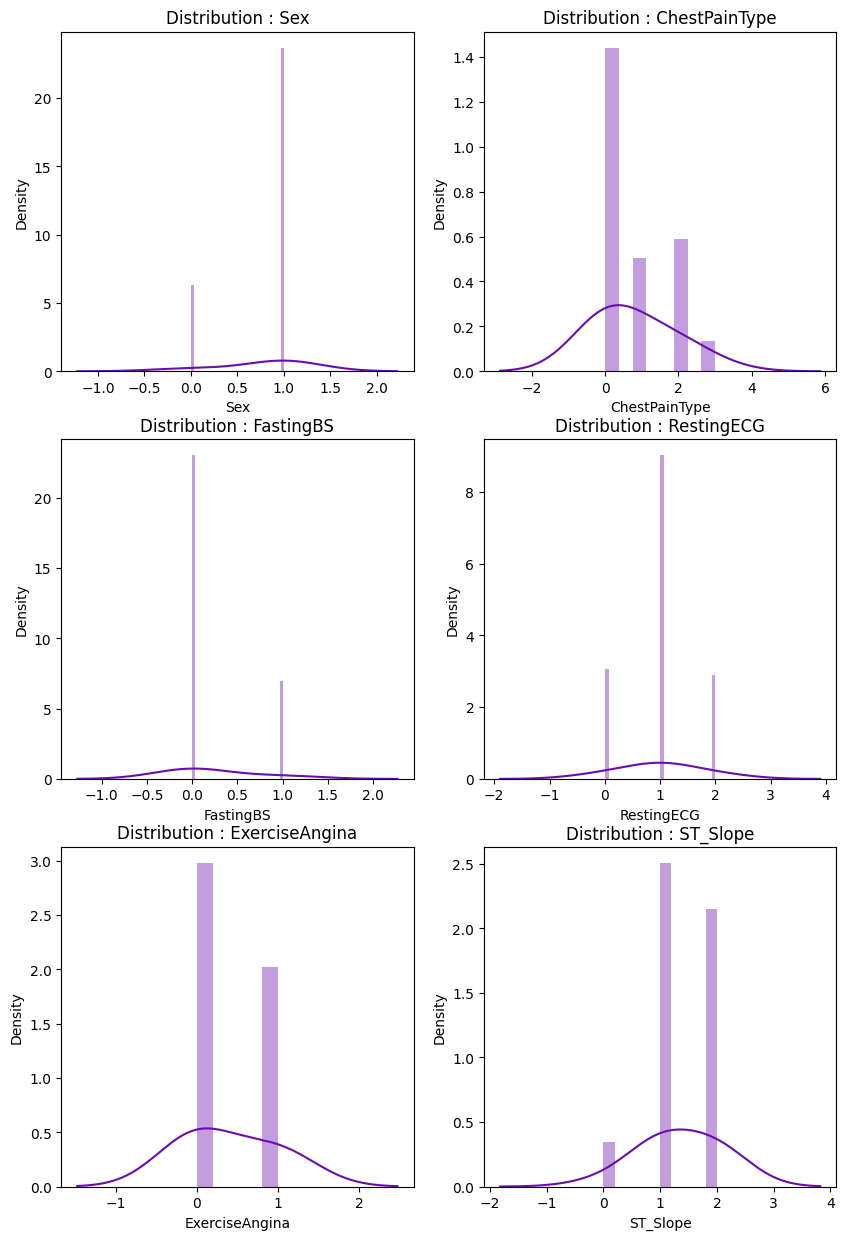

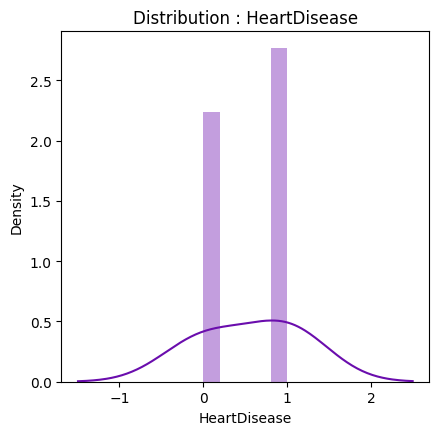

In [11]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title)

Semua fitur kategorikal terdistribusi normal

Distribusi fitur numerikal:

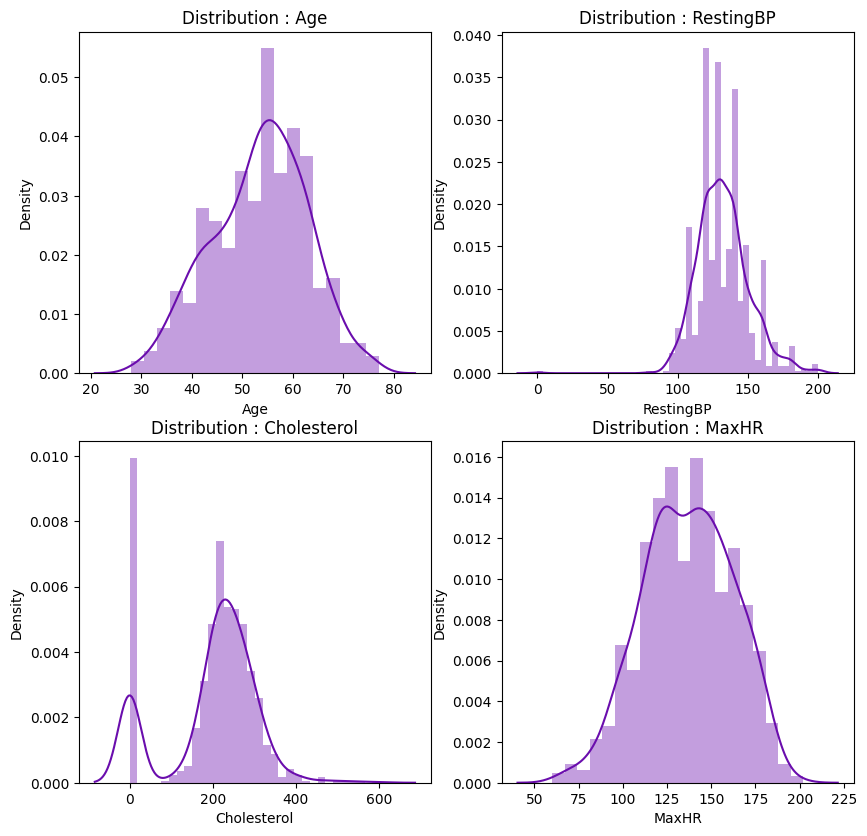

Text(0.5, 1.0, 'Distribution : Oldpeak')

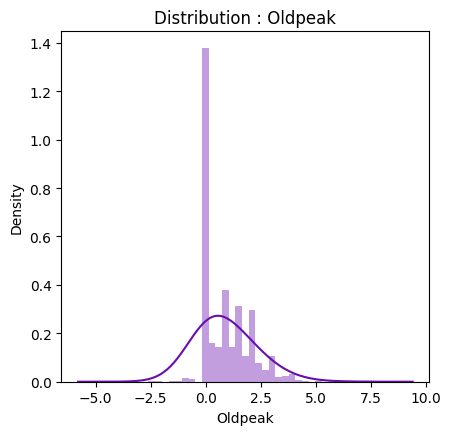

In [12]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title)

- Distribusi data **Oldpeak** memiliki kecenderungan miring ke kanan.
- Distribusi data **Cholesterol** bersifat bimodal

Visualisasi variabel target (HeartDisease):

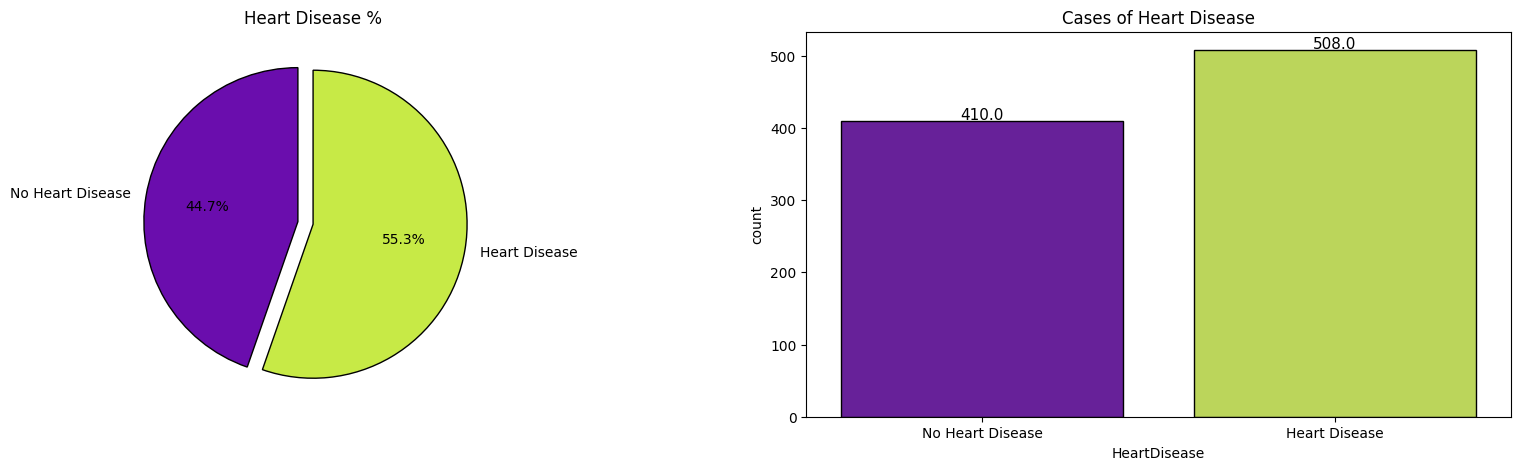

In [13]:
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')

plt.subplot(1, 2, 2)
ax = sns.countplot(x='HeartDisease', data=data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Cases of Heart Disease')

plt.show()


Variabel target dalam dataset ini cukup seimbang

Fitur kategorikal vs variabel target (HeartDisease):

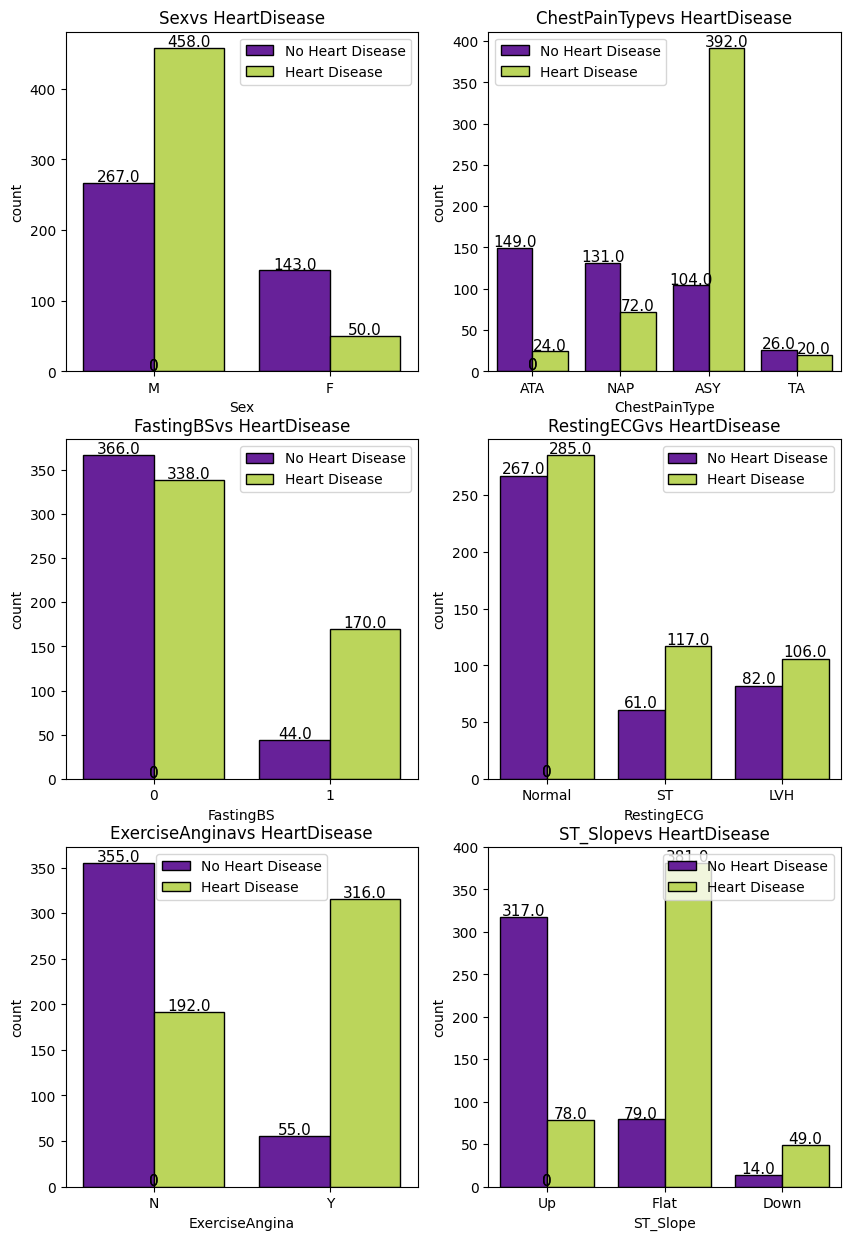

In [14]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))
for i in range(len(categorical_features) - 1):
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(x = categorical_features[i], data = data, hue = "HeartDisease", palette = colors, edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment = 'center', fontsize = 11)
    title = categorical_features[i] + "vs HeartDisease"
    plt.legend(['No Heart Disease', 'Heart Disease'])
    plt.title(title)

- Populasi laki-lai memiliki jumlah positif penyakit jantung yang lebih banyak dibandingkan dengan yang negatif penyakit jantung. Sebaliknya, pada populasi perempuan, jumlah positif penyakit jantung lebih sedikit dibanding jumlah negatif penyakit jantung.
- Jenis nyeri dada ASY menunjukkan kemungkinan besar terjadinya penyakit jantung.
- FastingBS agak membingungkan, pasien dengan diagnosis gula darah puasa dab tanpa gula darah puasa memiliki jumlah positif penyakit jantung yang signifikan.
- RestingECG tidak menunjukan kategori yang jelas yang menonjolkan positif penyakit jantung, ketiga nilai yang ada memiliki jumlah positif penyakit jantung yang tinggi.
- Angina yang dipicu oleh olahraga jelas meningkatkan kemungkinan didiagnosis dengan positif penyakit jantung.
- Berdasarkan nilai ST_Slope, kemiringan datar menunjukkan kemungkinan sangat tinggi untuk didiagnosis positif penyakit jantung.

Fitur kategorikal vs Positif penyakit jantung:

In [15]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

Text(0.5, 1.0, 'ST_Slope')

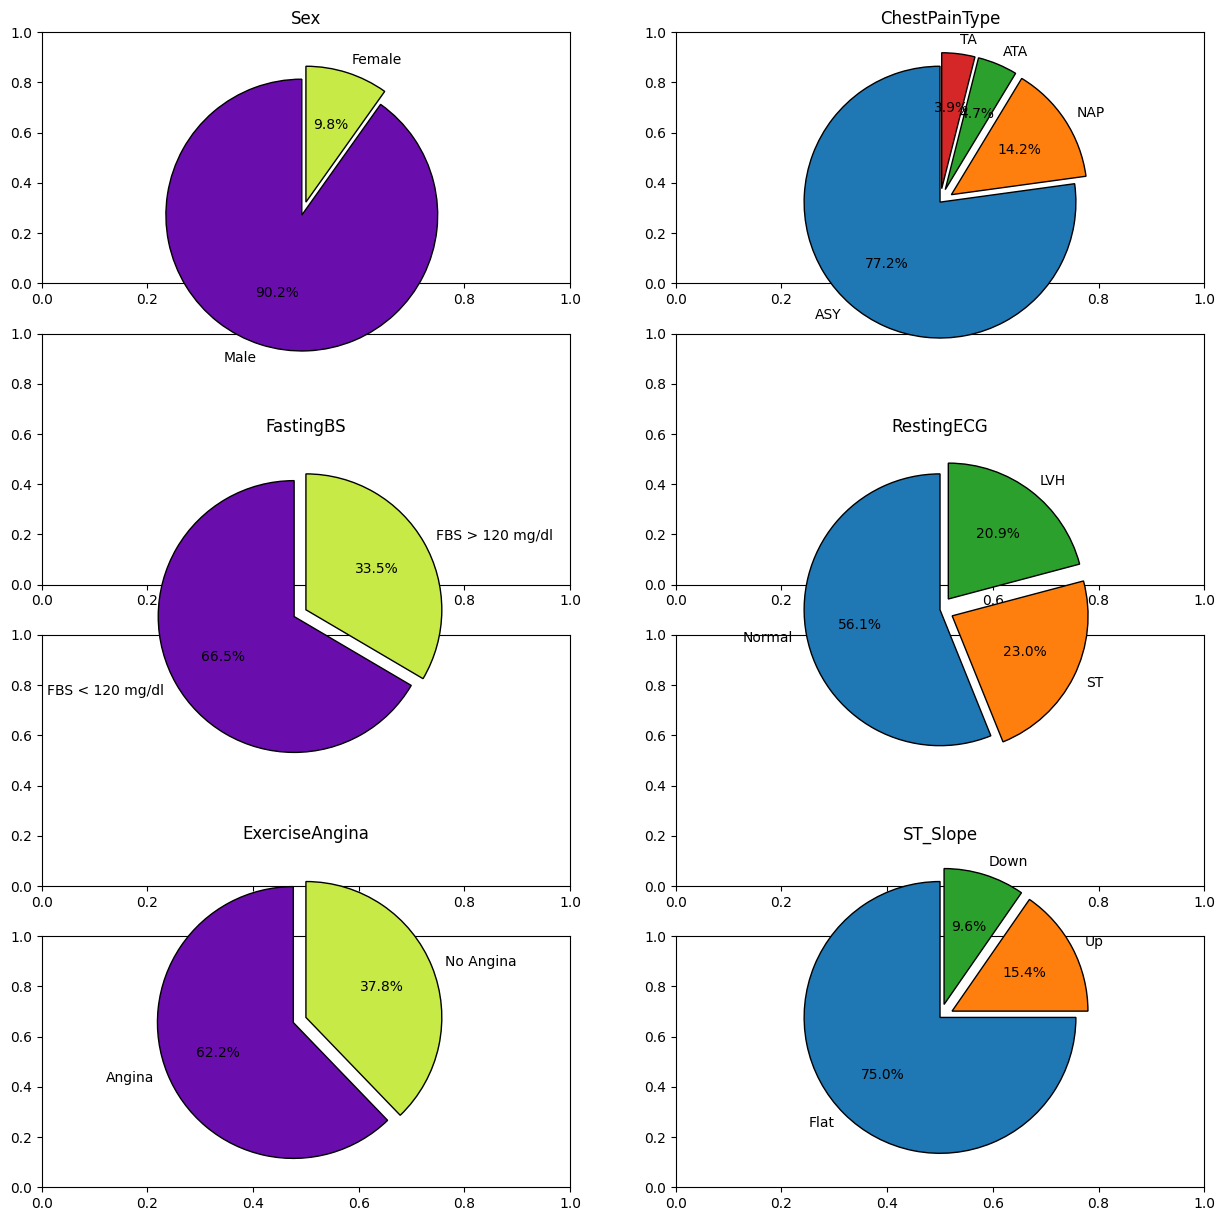

In [16]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex')

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType')

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS')

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG')

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina')

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope')

- Dari seluruh positif penyakit jantung, sekitar 90% di antaranya adalah laki-laki.
- Untuk jenis nyeri dadam tipe ASY merupakan yang terbanyak dengan 77% yang mengarah pada penyakit jantung.
- Kadar gula darah puasa di bawah 120 mg/dl menunjukkan kemungkinan tinggi terjadinya penyakit jantung.
- Untuk hasil ECG saat istirahat, level Normal memiliki kemungkinan 56% lebih tinggi untuk terkena penyakit jantung dibandingkan dengan level LVH dan ST.
- Deteksi Angina yang dipicu oleh latihan juga mengindikasikan adanya penyakit jantung.
- Untuk ST_Slope, level Flat mencakup sebagian besar dengan 75%, yang dapat membantu dalam mendeteksi masalah jantung.

Fitur numerikal vs Variabel target (HeartDisease):

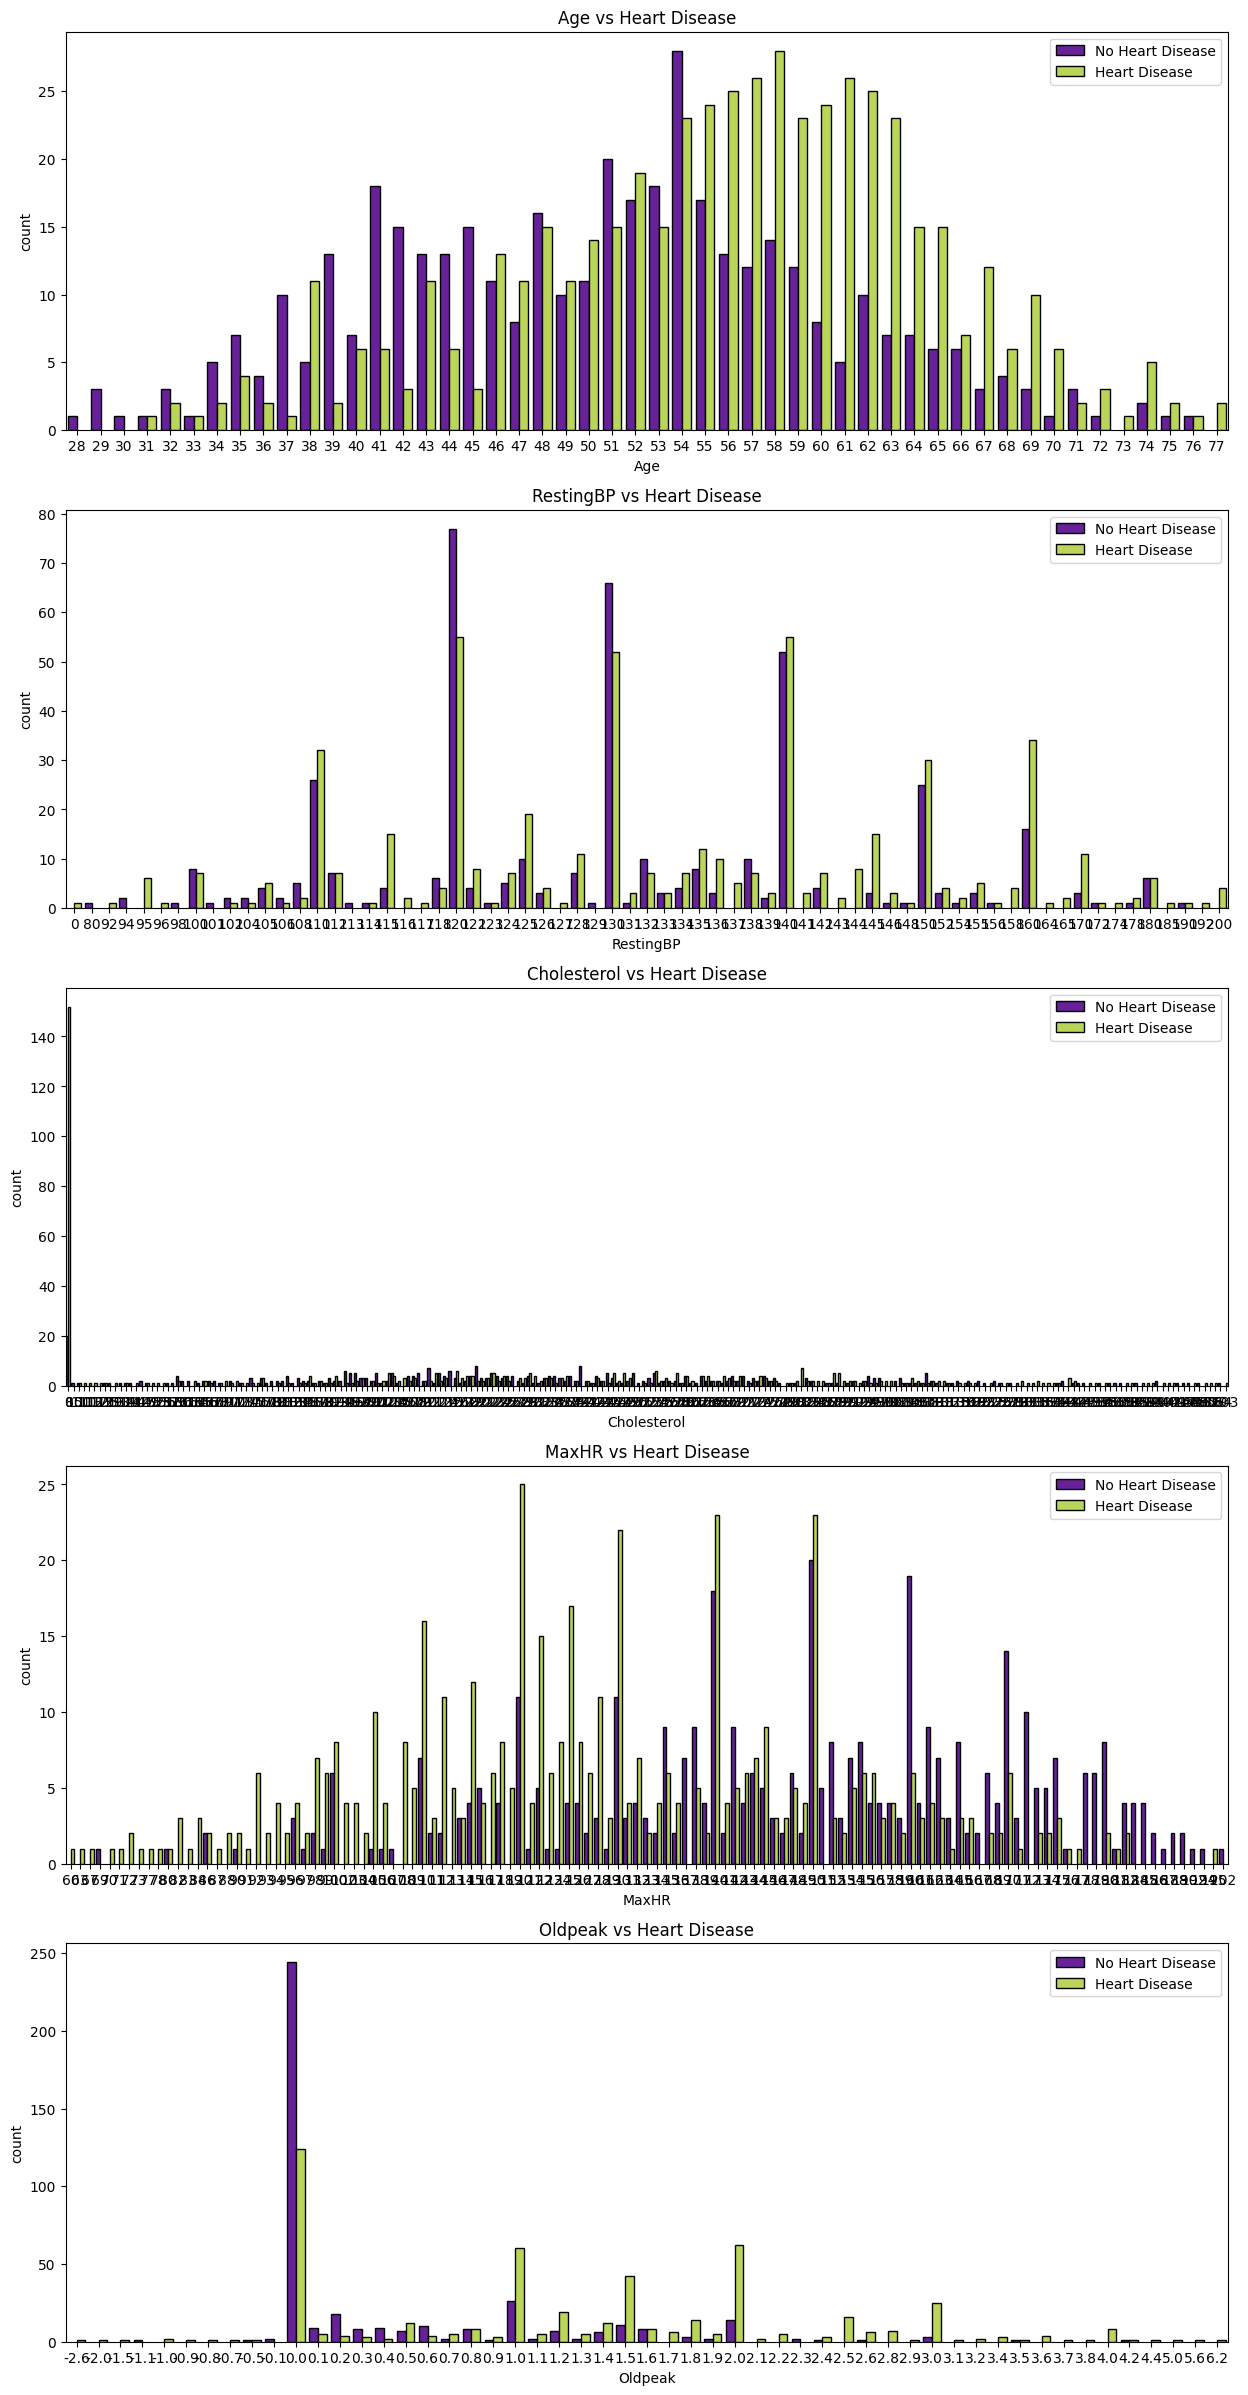

In [17]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,30))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sns.countplot(x = numerical_features[i], data = data, hue = "HeartDisease", palette = colors, edgecolor = 'black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title)

- Karena terlalu banyak titik data unik pada fitur-fitur di atas, sulit untuk mendapatkan insight yang jelas. Oleh karena itu, kita akan coba ubah fitur numerik, kecuali usia, menjadi fitur kategorikal untuk visualisasi yang lebih mudah dipahami.
- Kita lakukan scaling terhadap nilai-nilai individu dari fitur-fitur tersebut. Hal ini mengubah titik data yang bervariasi menjadi nilai konstan yang mewakili rentang tertentu.
- Bagi titik data dari fitur numerik dengan 5 atau 10 ddan tetapkan nilai hasil bagi sebagai nilai konstan perwakilan untuk titik data. Pilihan konstanta scaling 5 dan 10 diputuskan dengan pertimbangan data dan intuisi.

In [18]:
data['RestingBP_Group'] = [ int(i / 5) for i in data['RestingBP']]
data['Cholesterol_Group'] = [ int(i / 10) for i in data['Cholesterol']]
data['MaxHR_Group'] = [ int(i / 5) for i in data['MaxHR']]
data['Oldpeak_Group'] = [ int( (i*10) / 5) for i in data['Oldpeak']]

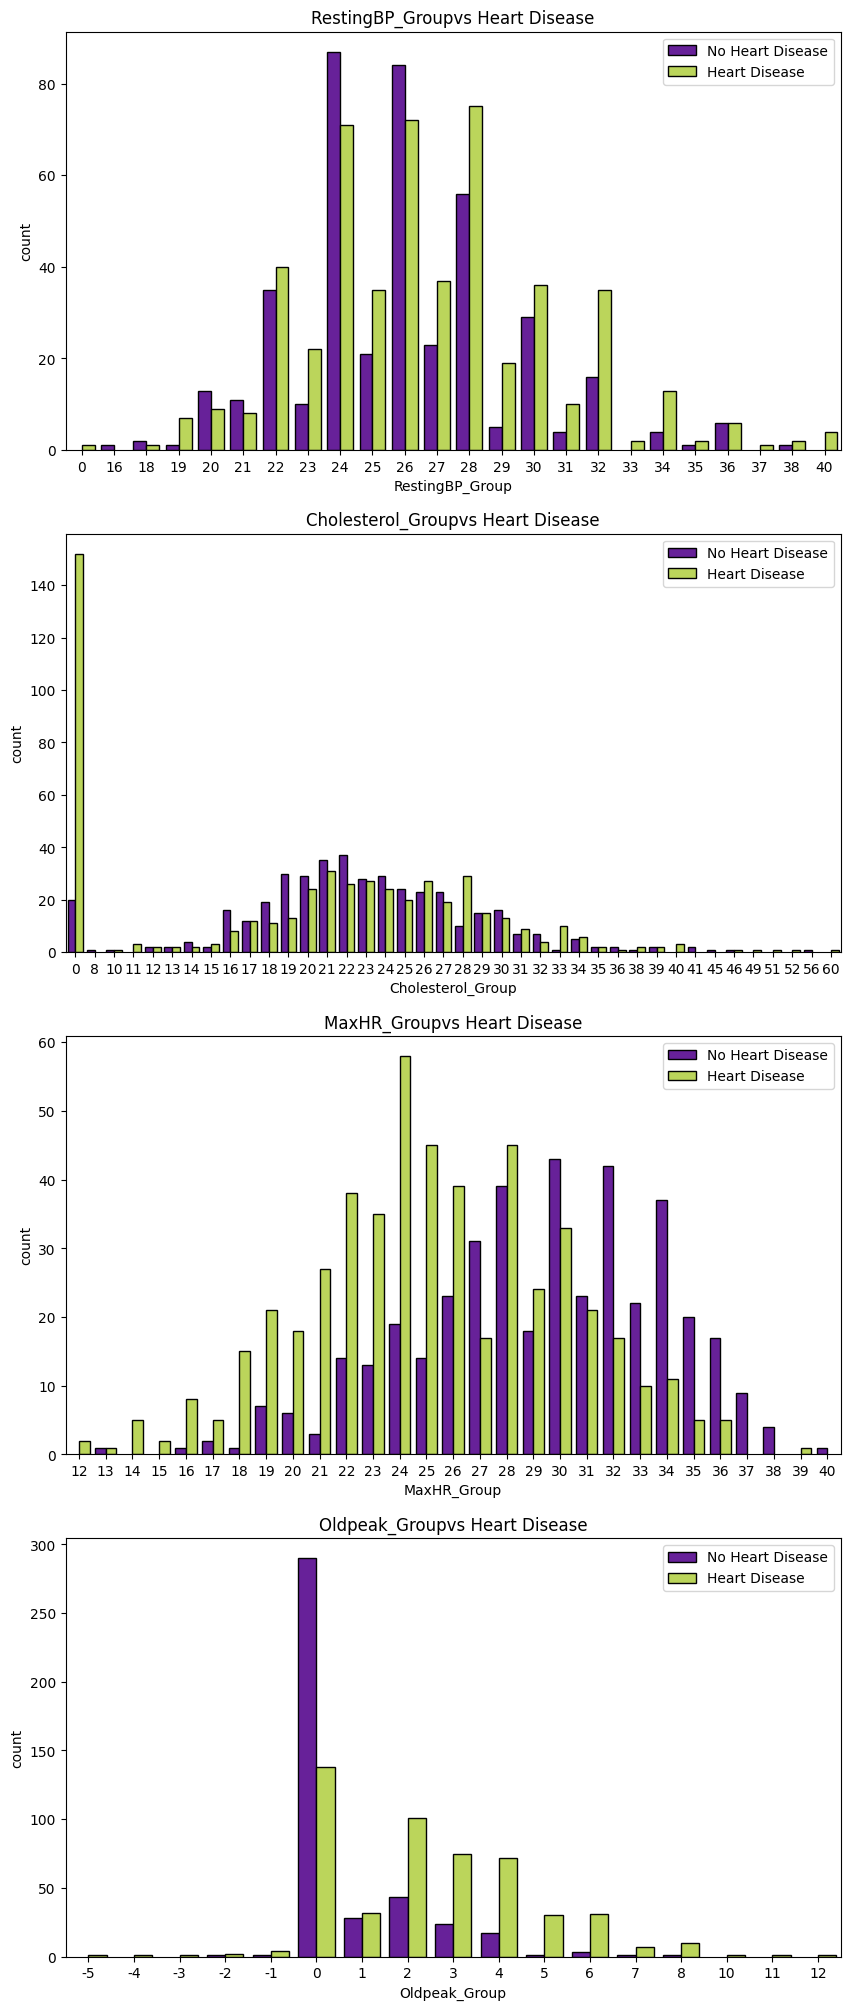

In [19]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (10, 25))
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(4, 1, i+1)
    sns.countplot(x = group_numerical_features[i], data = data, hue = 'HeartDisease', palette = colors, edgecolor = 'black')
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + 'vs Heart Disease'
    plt.title(title)

- Dari data RestingBP_Group, pembacaan antara 95 (19x5) hingga 170 (34x5) cenderung paling sering terdeteksi mengalami penyakit jantung.
- Tingkat kolesterol antara 160 (160x10) hingga 340 (34x10) sangat rentan terhadap penyakit jantung.
- untuk MaxHR, penyakit jantung jarang ditemukan di seluruh data, tetapi nilai antara 70 (14x5) hingga 180 (36x5) mendeteksi banyak kasus.
- Nilai Oldpeak juga menunjukkan adanya penyakit jantung secara keseluruhan.

Sex vs Fitur numerik:

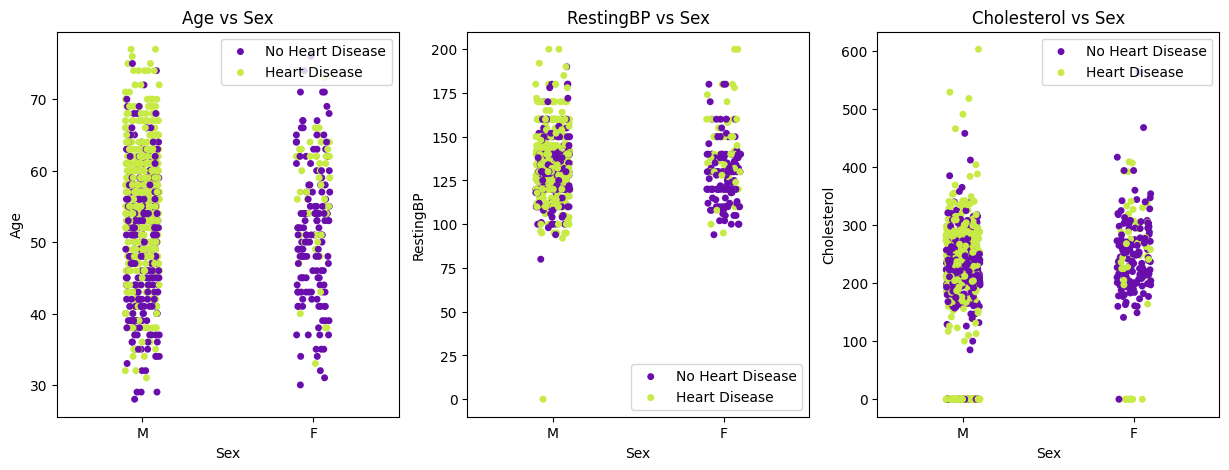

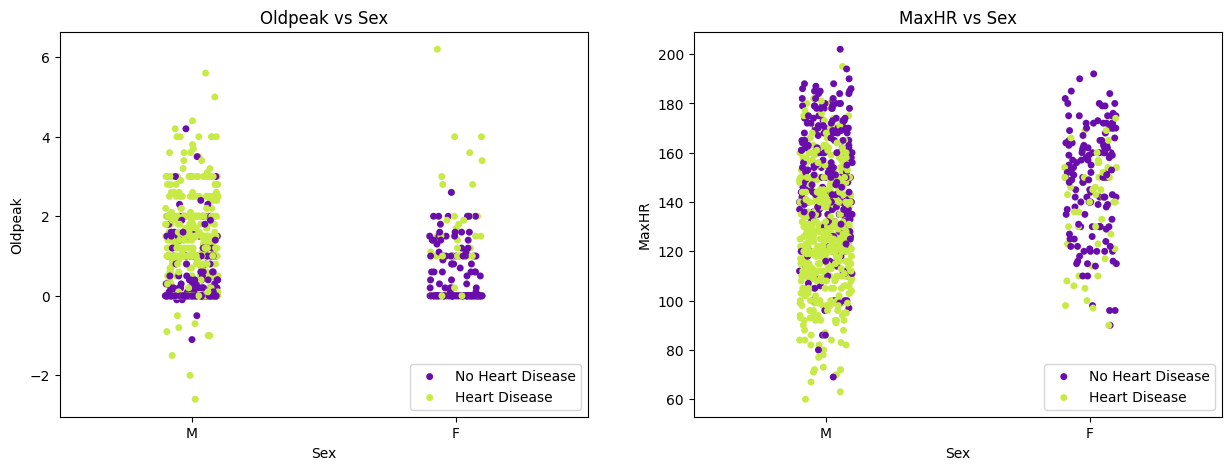

In [20]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title)

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title)

- Populasi laki-laki menunjukkan penyakit jantung pada hampir semua nilai fitur numerik. Di atas usia 50 tahun, dengan nilai Oldpeak positif dan denyut jantung maksimum di bawah 140, penyakit jantung pada populasi laki laki menjadi lebih banyak.
- Data populasi perempuan jauh lebih sedikit dibandingkan dengan data populasi pria. Oleh karena itu, kita tidak dapat menunjukkan rentang atau nilai tertentu yang menunjukkan kasus penyakit jantung.

ChestPainType vs Fitur numerik:

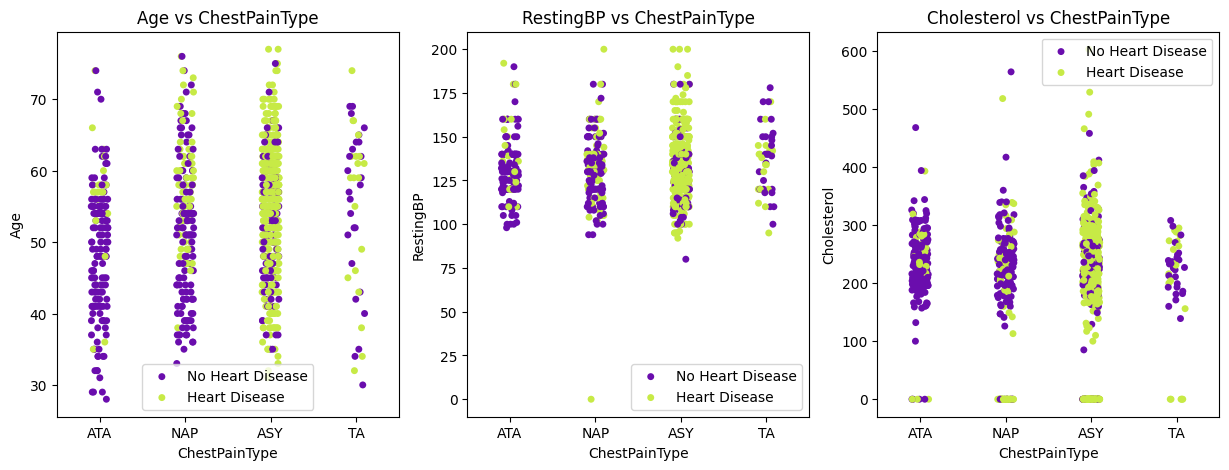

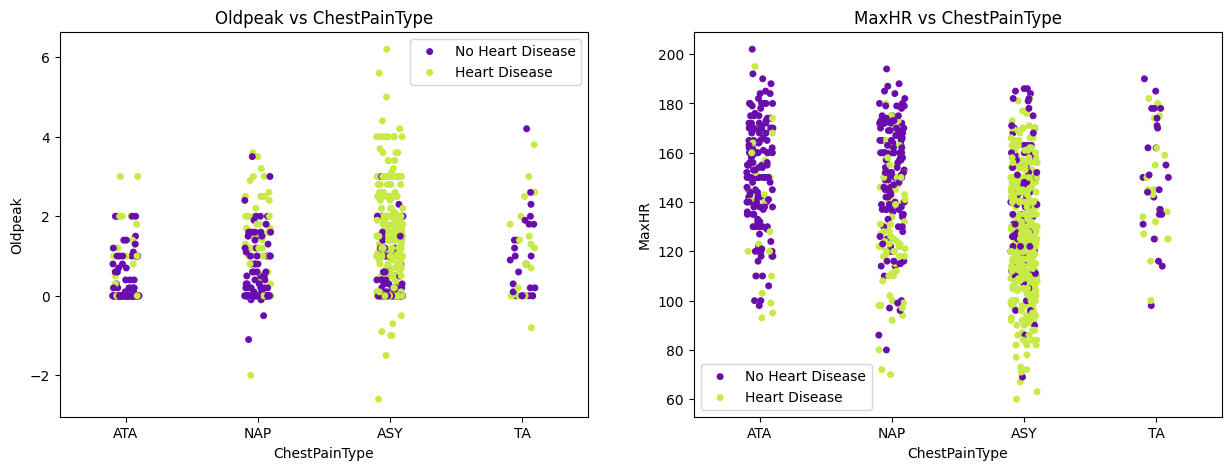

In [21]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title)

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType' 
    plt.title(title)

- Tipe nyeri dada ASY mendominasi jenis nyeri dada lainnya dalam semua fitur numerik dengan selisih cukup jauh.

FastingBS vs Fitur numerik:

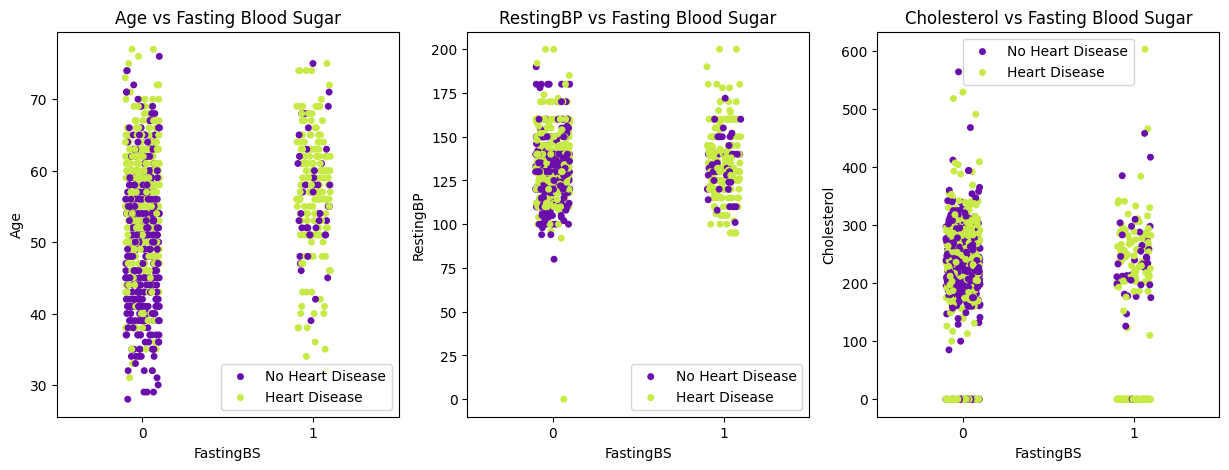

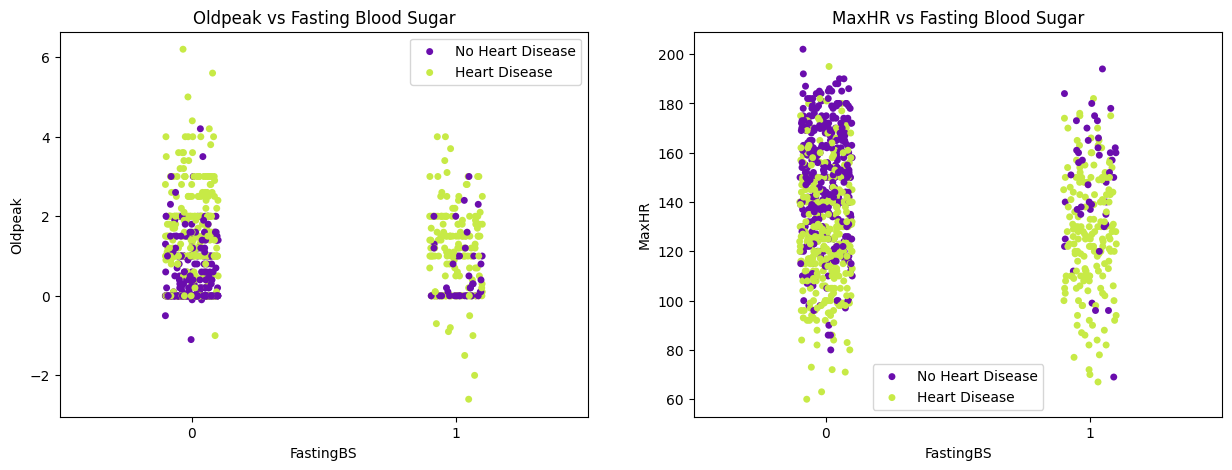

In [22]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title)

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title)

- Di atas usia 50 tahun, penyakit jantung ditemukan di seluruh data, terlepas dari apakah pasien didiagnosis dengan kadar gula darah puasa atau tidak.
- Gula darah puasa dengan tekanan darah saar istirahat di atas 100 menunjukkan lebih banyak kasus penyakit jantung dibandingkan dengan pasien tanpa gula darah puasa.
- Kolesterol dengan gula darah puasa tampaknya tidak berpengaruh dalam memahami penyebab penyakit jantung.
- Pasien yang tidak memiliki gula darah puasa positif tetapi memiliki denyut jantung maksimum di bawah 130 lebih rentan terhadap penyakit jantung.

RestingECG vs Fitur numerik:

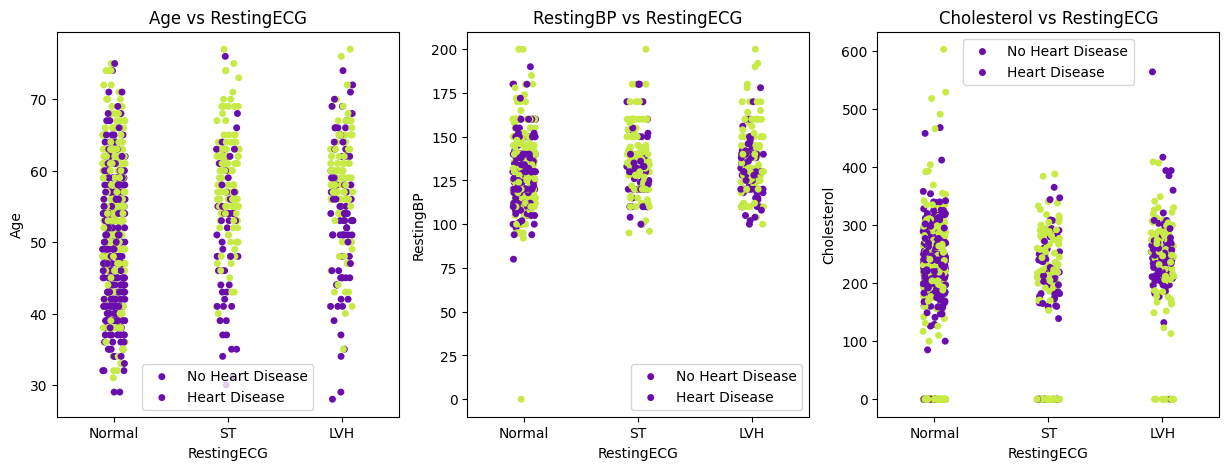

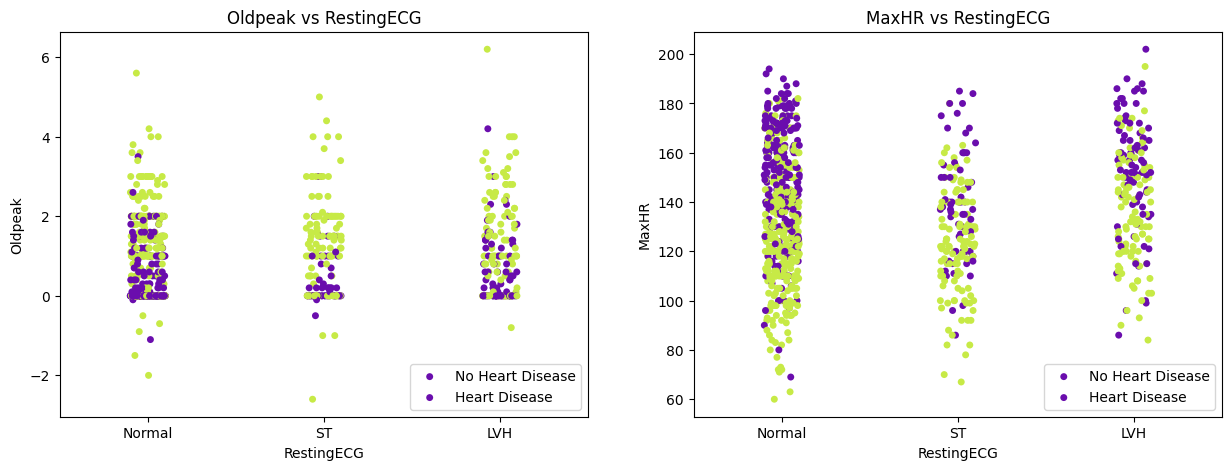

In [23]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG' 
    plt.title(title)

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title)

- Penyakit jantung dengan nilai RestingECG Normal, ST, dan LVH mulai terdeteksi dari usia 30 dan 40 tahun.
- Pasien di atas usia 50 tahun lebih rentan dibandingkan usia lainnya, terlepas dari nilai RestingECG.
- Nilai kolesterol antara 200 - 300 yang disertai dengan nilai ST dari RestingECG menunjukkan sekelompok pasien yang menderita penyakit jantung.
- Untuk nilai denyut jantung maksimum, penyakit jantung terdeteksi lebih banyak di bawah 140 poin dengan RestingECG Normal.
- ST dan LVH pada seluruh rentang nilai denyut jantung maksimum juga menunjukkan kasus penyakit jantung.

ExerciseAngina vs Fitur numerik:

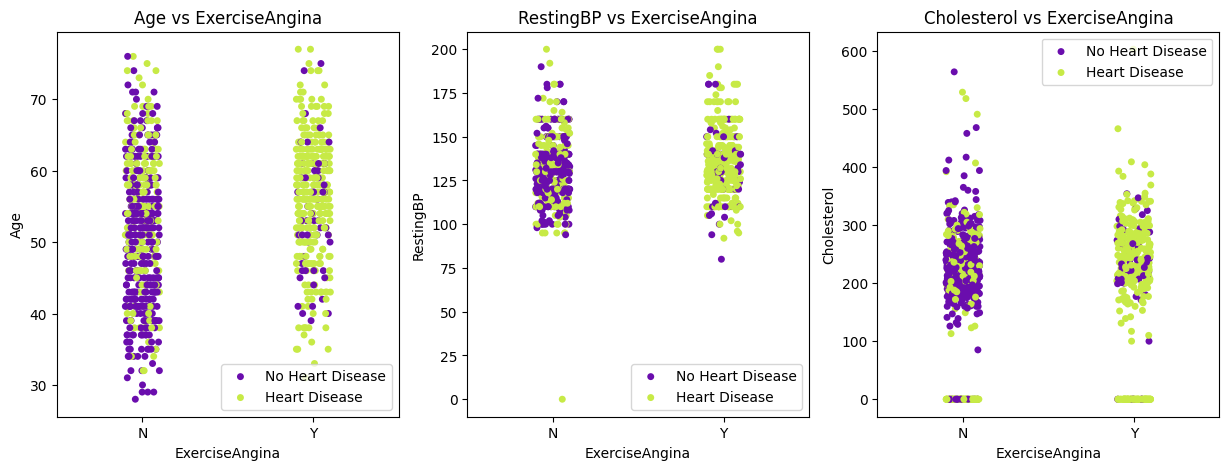

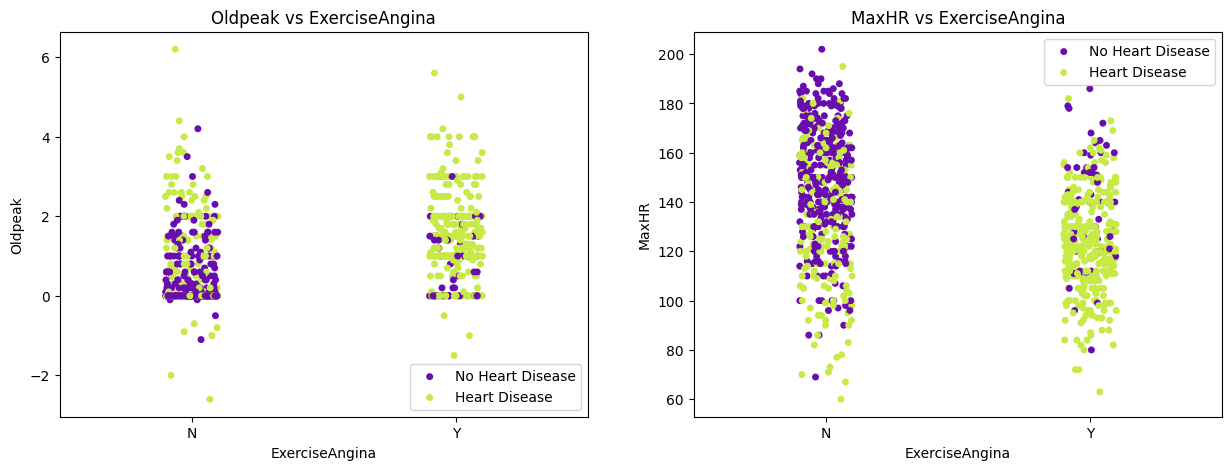

In [24]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title)

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina' 
    plt.title(title)

- Dapat diamati dengan jelas adanya hubungan antara kasus penyakit jantung dan Angina yang dipicu oleh olahraga. korelasi positif antara kedua fitur ini dapat disimpulkan dari semua fitur.

ST_Slope vs Fitur numerik:

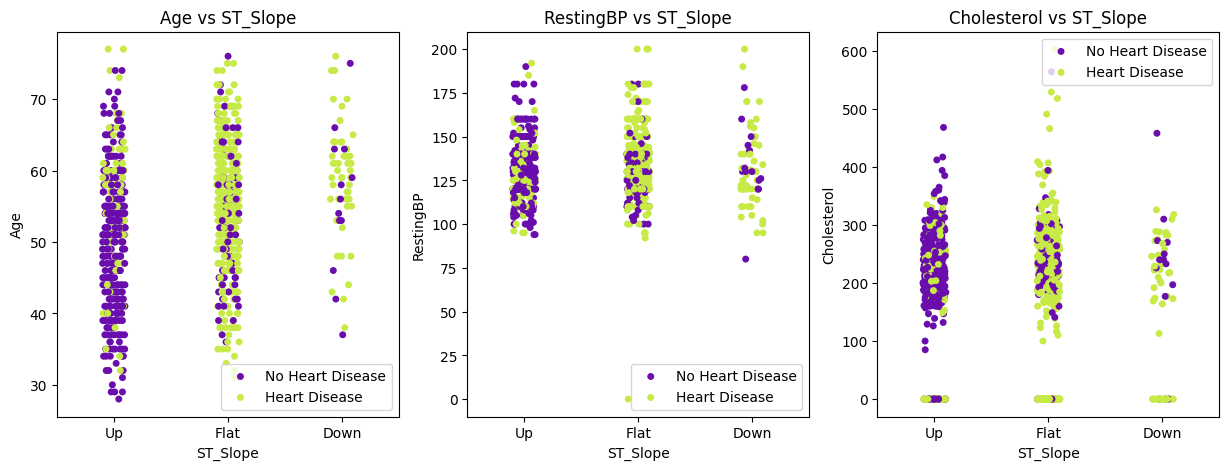

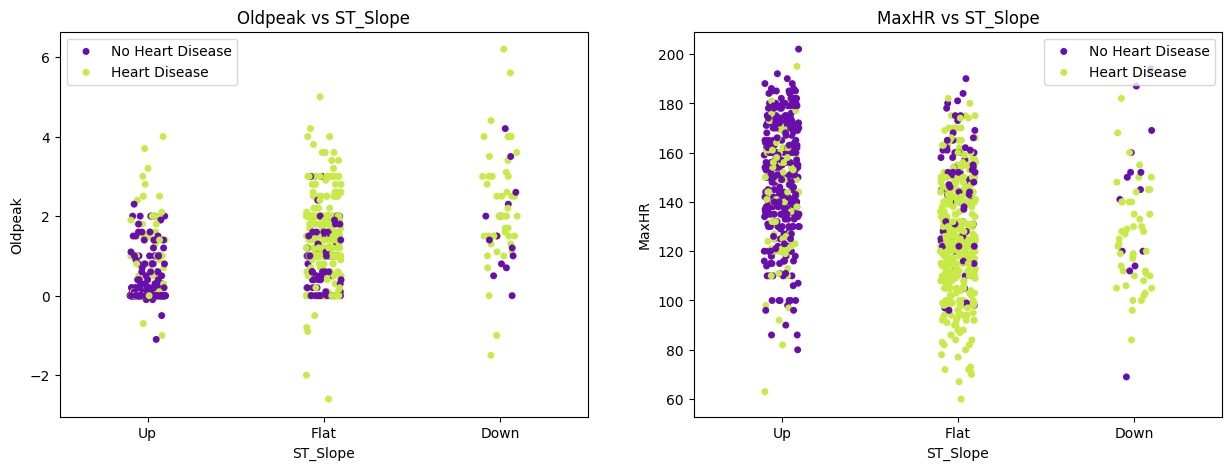

In [25]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope' 
    plt.title(title)

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title)

- Pengamatan positif yang jelas lainnya dapat dilakukan mengenai korelasi positif antara ST_Slope dan kasus penyakit jantung.
- Nilai Flat, Down, dan Up secara berurutan menunjukkan kemungkinan tinggi, sedang, dan rendah untuk didiagnosis dengan penyakit jantung.

Fitur numerik vs Fitur numerik dengan variabel target (HeartDisease):

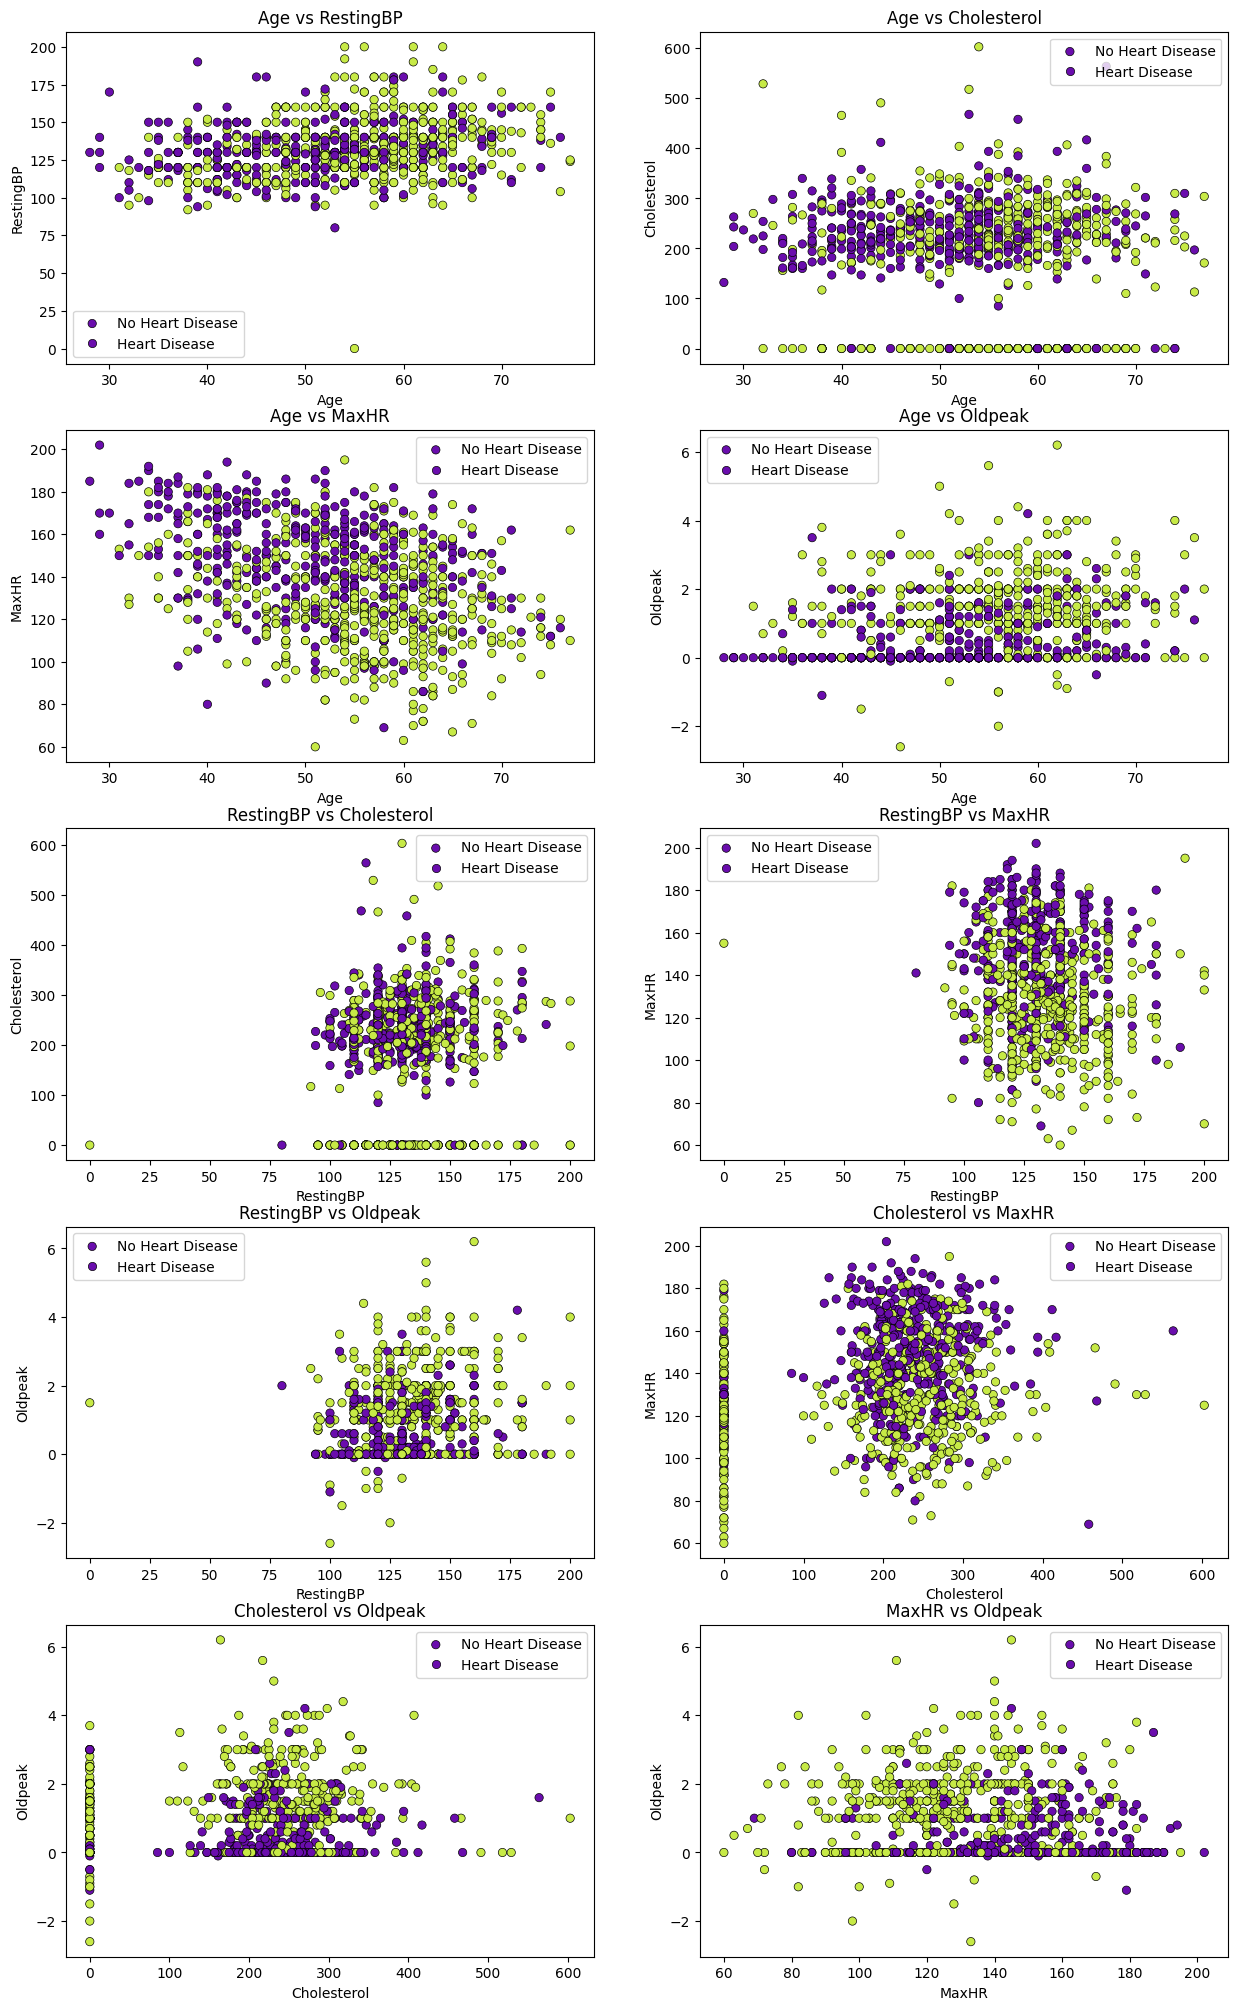

In [26]:
a = 0
fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize = (15, 25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5, 2, a)
            sns.scatterplot(x = numerical_features[i], y =numerical_features[j], data = data, hue = 'HeartDisease', palette = colors, edgecolor = 'black')
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- Untuk usia di atas 50 tahun, tekanan darah saat istirahat antara 100 - 175, kadar kolesterol 200 - 300, denyut jantung maksimum di bawah 160, dan nilai Oldpeak positif menjukkan banyak banyak kasus penyakit jantung.
- Tekanan darah saat istirahat antara 100 - 175 menyoroti banyak pasien penyakit jantung di semua fitur.
- Nilai kolesterol antara 200 - 300 mendominasi kasus penyakit jantung.
- Demikian pula, nilai denyut jantung maksimum di bawah 140 memiliki kemungkinan tinggi didiagnosis dengan penyakit jantung.

***
### Ringkasan EDA
***
### Fitur Kategorikal:
- **Sex**: Male > Female
- **ChestPaintype**: ASY > NAP > ATA > TA
- **FastingBS**: (FBS <120 mg/dl) > (FBS > 120 mg/dl)
- **RestingECG**: Normal > ST > LVH
- **ExerciseAngina**: Angina > No Angina
- **ST_slope**: Flat > Up > Down
### Fitur Numerikal:
- **Age**: 50+
- **RestingBP**: 95 - 170
- **Cholesterol**: 160 - 340
- **MaxHR**: 70 - 180
- **Oldpeak**: 0 - 4

***
## Feature Engineering
***

### Data Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()
ss = StandardScaler()

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0 -1.43    1              1       0.41         0.83          0           1   
1 -0.48    0              2       1.49        -0.17          0           1   
2 -1.75    1              1      -0.13         0.77          0           2   
3 -0.58    0              0       0.30         0.14          0           1   
4  0.05    1              2       0.95        -0.03          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0   1.38               0     0.30         2             0  
1   0.75               0     0.41         1             1  
2  -1.53               0     0.30         2             0  
3  -1.13               1     0.47         1             1  
4  -0.58               0     0.30         2             0

- Model machine learning tidak memahami satuan dari nilai fitur. Model hanya memperlakukan input sebagai angka sederhana tanpa memahami makna sebenarnya dari nilai tersebut. Oleh karena itu, scaling data menjadi penting. contoh: Usia = Tahun, FastingBS = mg/dl.
- Ada dua opsi untuk scaling data: Normalisasi dan Standardisasi. Karena sebagian besar algoritma mengasumsikan data terdistribusi secara normal (Gaussian), normalisasi dilakukan pada fitur-fitur yang datanya datanya tidak menunjukkan distribusi normal, dan standardisasi dilakukan pada fitur yang terdistribusi secara normal di mana nilainya sangat besar atau sangat kecil dibandingkan dengan fitur lain.
- Normalisasi: Fitur Oldpeak dinormalisasi karena menunjukkan distribusi data yang condong ke kanan.
- Standardisasi: Fitur Usia, RestingBP, Kolesterol, dan MaxHR discaling karena fitur-fitur ini terdistribusi secara normal.

### Correlation Matrix

<Axes: >

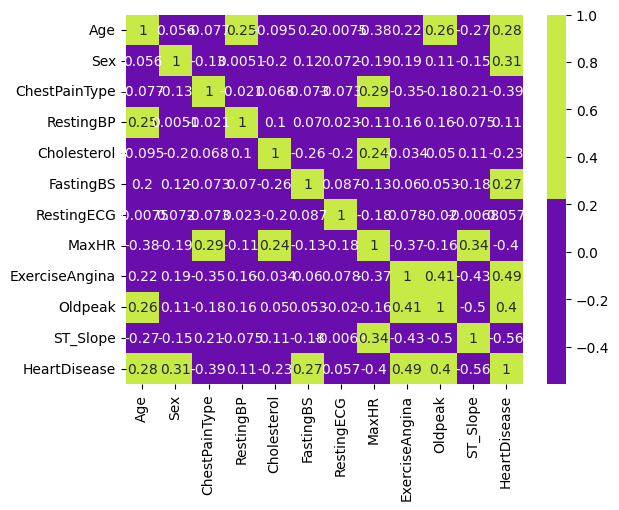

In [28]:
plt.figure(figure = (20, 5))
sns.heatmap(df1.corr(), cmap = colors, annot = True)

- Matriksnya masih berisi terlalu banyak fitur. Kita akan memeriksa korelasi hanya terkait dengan HeartDisease

Text(0.5, 1.0, 'Correlation w.r.t HeartDisease')

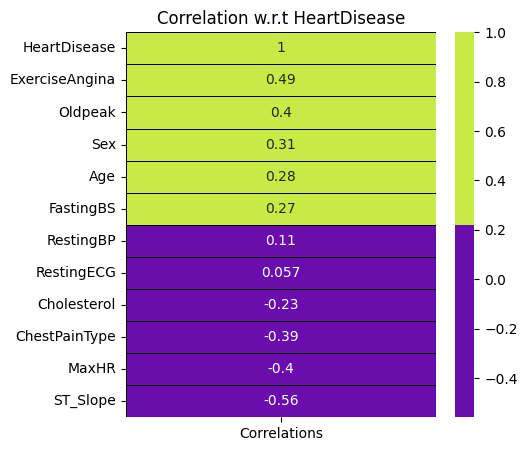

In [29]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot= True, cmap = colors, linewidths = 0.4, linecolor= 'black')
plt.title('Correlation w.r.t HeartDisease')

- Kecuali RestingBP dan RestingECG, semua fitur lainnya menunjukkan hubungan positif atau negatif dengan HeartDisease.

### Fitur Selection untuk Fitur Kategorikal

Chi Squared Test:

In [30]:
from sklearn.feature_selection import SelectKBest, chi2

Text(0.5, 1.0, 'Selection of Categorical Features')

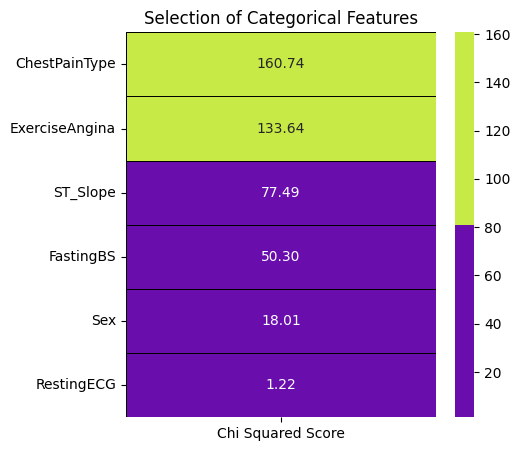

In [31]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features')

- Kecuali RestingECG, semua fitur kategorikal lainnya cukup penting dalam memprediksi penyakit jantung.

### Fitur Selection untuk Fitur Numerikal

ANOVA Test:

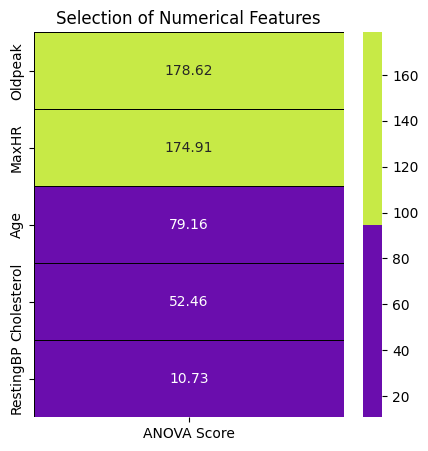

In [32]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- Kita akan mengabaikan RestingBP dari bagian pemodelan dab mengambil fitur-fitur yang tersisa.

***
## Modeling
***

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
features =df1[df1.columns.drop(['HeartDisease', 'RestingBP', 'RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=2)

- Bagi data menjadi 80 - 20 untuk train dan test.

In [35]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve_manual(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

### KNN (K-Nearest Neighbors)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
classifier_knn.fit(x_train, y_train)
classifier_knn_pred = classifier_knn.predict(x_test)

In [37]:
# Hold-out validation

from sklearn.metrics import recall_score, f1_score
recall = recall_score(y_test, classifier_knn_pred)
f1 = f1_score(y_test, classifier_knn_pred)
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Recall: 0.86
F1-Score: 0.83


In [38]:
# K-Fold Cross-Validation

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=2)

recall_scores = cross_val_score(classifier_knn, features, target, cv=kf, scoring='recall')
f1_scores = cross_val_score(classifier_knn, features, target, cv=kf, scoring='f1')

print(f"Mean Recall: {recall_scores.mean()}, Std: {recall_scores.std()}")
print(f"Mean F1-Score: {f1_scores.mean()}, Std: {f1_scores.std()}")


Mean Recall: 0.8637508300666195, Std: 0.028034587460259514
Mean F1-Score: 0.8548588770659524, Std: 0.02500970840458754


In [39]:
# Manual

from supervised_learning.knn import KNN
classifier_knn_manual = KNN(n_neighbors=3, metric='manhattan', p=1)
classifier_knn_manual.fit(x_train, y_train)
knn_manual_pred = classifier_knn_manual.predict(x_test)

In [40]:
# Hold-out Validation

recall_manual = recall_score(y_test, knn_manual_pred)
f1_manual = f1_score(y_test, knn_manual_pred)
print(f"Recall: {recall_manual:.2f}")
print(f"F1-Score: {f1_manual:.2f}")

Recall: 0.86
F1-Score: 0.83


In [41]:
# K-Fold Validation

kf = KFold(n_splits=5, shuffle=True, random_state=2)

recall_scores = cross_val_score(classifier_knn_manual, features, target, cv=kf, scoring='recall')
f1_scores = cross_val_score(classifier_knn_manual, features, target, cv=kf, scoring='f1')

print(f"Mean Recall: {recall_scores.mean()}, Std: {recall_scores.std()}")
print(f"Mean F1-Score: {f1_scores.mean()}, Std: {f1_scores.std()}")

Mean Recall: 0.8637508300666195, Std: 0.028034587460259514
Mean F1-Score: 0.8548588770659524, Std: 0.02500970840458754


Untuk masalah prediksi penyakit jantung, kita pilih **Recall** dan **F1-Score** sebagai metrik utama untuk mengevaluasi kinerja model KNN.
- **Recall** dipilih karena kita ingin memastikan sebanyak mungkin kasus penyakit terdeteksi (menghindari false negatives), yang sangat penting dalam konteks kesehatan.
- **F1-Score** dipilh karena ini menggabungkan precision dan recall, memberikan keseimbangan antara kedua metrik tersebut, terutama ketika ada trade-off antara false positives dan false negatives

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 
classifier_lr.fit(x_train, y_train)
classifier_lr_pred = classifier_lr.predict(x_test)

In [43]:
# Hold-out validation

from sklearn.metrics import recall_score, f1_score
recall = recall_score(y_test, classifier_lr_pred)
f1 = f1_score(y_test, classifier_lr_pred)
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Recall: 0.89
F1-Score: 0.88


In [44]:
# K-Fold Cross-Validation

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=2)

recall_scores = cross_val_score(classifier_lr, features, target, cv=kf, scoring='recall')
f1_scores = cross_val_score(classifier_lr, features, target, cv=kf, scoring='f1')

print(f"Mean Recall: {recall_scores.mean()}, Std: {recall_scores.std()}")
print(f"Mean F1-Score: {f1_scores.mean()}, Std: {f1_scores.std()}")


Mean Recall: 0.880270119743804, Std: 0.018288137485611984
Mean F1-Score: 0.8737436360469122, Std: 0.01966172522899552


In [45]:
# Manual

from supervised_learning.logistic_regression import LogisticRegressionManual
lr_manual = LogisticRegressionManual(learning_rate=0.1, num_iterations=1000, regularization='l2', reg_lambda=0.1, method='newton')
lr_manual.fit(x_train, y_train)
lr_manual_pred = lr_manual.predict(x_test)
print("Accuracy: ",'{0:.2%}'.format(accuracy_score(y_test, lr_manual_pred)))

Iteration 0: Cost 0.6931471805599453
Iteration 100: Cost 0.3609611851885818
Iteration 200: Cost 0.36086970020309417
Iteration 300: Cost 0.36081918406653996
Iteration 400: Cost 0.36079126726553407
Iteration 500: Cost 0.3607758295069343
Iteration 600: Cost 0.36076728821100434
Iteration 700: Cost 0.36076256069118706
Iteration 800: Cost 0.360759943275934
Iteration 900: Cost 0.360758493802913
Accuracy:  87.50%


In [46]:
# Hold-out validation

from sklearn.metrics import recall_score, f1_score
recall = recall_score(y_test, lr_manual_pred)
f1 = f1_score(y_test, lr_manual_pred)
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Recall: 0.89
F1-Score: 0.88


In [47]:
# K-Fold Cross-Validation

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=2)

recall_scores = cross_val_score(lr_manual, features, target, cv=kf, scoring='recall')
f1_scores = cross_val_score(lr_manual, features, target, cv=kf, scoring='f1')

print(f"Mean Recall: {recall_scores.mean()}, Std: {recall_scores.std()}")
print(f"Mean F1-Score: {f1_scores.mean()}, Std: {f1_scores.std()}")


Iteration 0: Cost 0.6931471805599453
Iteration 100: Cost 0.3609611851885818
Iteration 200: Cost 0.3608697002030943
Iteration 300: Cost 0.36081918406653984
Iteration 400: Cost 0.36079126726553407
Iteration 500: Cost 0.3607758295069343
Iteration 600: Cost 0.36076728821100434
Iteration 700: Cost 0.36076256069118706
Iteration 800: Cost 0.360759943275934
Iteration 900: Cost 0.360758493802913
Iteration 0: Cost 0.6931471805599453
Iteration 100: Cost 0.3735510977877886
Iteration 200: Cost 0.3735488396106598
Iteration 300: Cost 0.3735476290831393
Iteration 400: Cost 0.373546980224826
Iteration 500: Cost 0.37354663245234626
Iteration 600: Cost 0.3735464460639183
Iteration 700: Cost 0.37354634617277105
Iteration 800: Cost 0.3735462926395156
Iteration 900: Cost 0.3735462639507408
Iteration 0: Cost 0.6931471805599453
Iteration 100: Cost 0.3649719229526598
Iteration 200: Cost 0.3648225630020894
Iteration 300: Cost 0.3647415823115915
Iteration 400: Cost 0.3646976067832642
Iteration 500: Cost 0.364673

Untuk masalah prediksi penyakit jantung, kita pilih **Recall** dan **F1-Score** sebagai metrik utama untuk mengevaluasi kinerja model Logistic Regression.
- **Recall** dipilih karena kita ingin memastikan sebanyak mungkin kasus penyakit terdeteksi (menghindari false negatives), yang sangat penting dalam konteks kesehatan.
- **F1-Score** dipilh karena ini menggabungkan precision dan recall, memberikan keseimbangan antara kedua metrik tersebut, terutama ketika ada trade-off antara false positives dan false negatives

### Gaussian Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
from supervised_learning.gaussian_naivebayes import GaussianNaiveBayes

In [49]:
gnb = GaussianNB(priors=None, var_smoothing=1e-9)
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

In [50]:
# Hold-out validation

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, gnb_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


In [51]:
# K-Fold Cross-Validation

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=2)

accuracy = cross_val_score(gnb, features, target, cv=kf, scoring='accuracy')

print(f"Mean Accuracy: {accuracy.mean()}, Std: {accuracy.std()}")


Mean Accuracy: 0.8474400095034451, Std: 0.023999726869421496


In [52]:
# Manual
gnb_manual = GaussianNaiveBayes()
gnb_manual.fit(x_train, y_train)

gnb_manual_pred = gnb_manual.predict(x_test)

In [53]:
# Hold-out validation

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, gnb_manual_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


In [54]:
# K-Fold Cross-Validation

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=2)

accuracy = cross_val_score(gnb_manual, features, target, cv=kf, scoring='accuracy')

print(f"Mean Accuracy: {accuracy.mean()}, Std: {accuracy.std()}")


Mean Accuracy: 0.8474400095034451, Std: 0.023999726869421496


Untuk masalah prediksi penyakit jantung, kita pilih **Accuracy** sebagai metrik utama untuk mengevaluasi kinerja model Gaussian Naive Bayes.
- **Accuracy** dipilih karena Gaussian Naive Bayes cenderung memberikan hasil yang baik pada data yang seimbang, sehingga accuracy dapat memberikan gambaran keseluruhan performa model.

### CART (Classification and Regression Tree)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from supervised_learning.decision_tree import DecisionTreeManual

In [56]:
dt_classifier = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
dt_classifier.fit(x_train, y_train)
dt_classifier_pred = dt_classifier.predict(x_test)

In [57]:
# Hold-out validation

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, dt_classifier_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


In [58]:
# K-Fold Cross-Validation

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=2)

accuracy = cross_val_score(dt_classifier, features, target, cv=kf, scoring='accuracy')

print(f"Mean Accuracy: {accuracy.mean()}, Std: {accuracy.std()}")


Mean Accuracy: 0.8486101211689239, Std: 0.014104976701721754


In [59]:
# Manual
dt_classifier_manual = DecisionTreeManual(max_depth=4, min_samples_split=1)
dt_classifier_manual.fit(x_train, y_train)
dt_classifier_manual_pred = dt_classifier_manual.predict(x_test)

In [60]:
# Hold-out validation

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, dt_classifier_manual_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


In [61]:
# K-Fold Cross-Validation

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=2)

accuracy = cross_val_score(dt_classifier_manual, features, target, cv=kf, scoring='accuracy')

print(f"Mean Accuracy: {accuracy.mean()}, Std: {accuracy.std()}")


Mean Accuracy: 0.848616060822048, Std: 0.017440419703259744


Untuk masalah prediksi penyakit jantung, kita pilih **Accuracy** sebagai metrik utama untuk mengevaluasi kinerja model Decision Tree Classifier.
- **Accuracy** dipilih karena Decision Tree cenderung overfit pada data pelatihan jika tidak diatur dengan baik, sehingga accuracy pada data uji dapat memberikan gambaran awal mengenai performa model.

### SVM (Support Vector Machine)

In [62]:
from sklearn.svm import SVC
svm_classifier = SVC(probability=True, random_state=1)
svm_classifier.fit(x_train, y_train)
svm_classifier_pred = svm_classifier.predict(x_test)

In [63]:
# Hold-out validation

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, svm_classifier_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [64]:
# K-Fold Cross-Validation

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=2)

accuracy = cross_val_score(svm_classifier, features, target, cv=kf, scoring='accuracy')

print(f"Mean Accuracy: {accuracy.mean()}, Std: {accuracy.std()}")


Mean Accuracy: 0.8583689712520789, Std: 0.02494944914004243


In [65]:
# Manual
# God, i give up on developing this algorithm, i spent almost two days just for this algorithm, and i only got 52%

from supervised_learning.svm import SVMManual
svm_manual = SVMManual(learning_rate=0.001, C=1.0, n_iters=1000, kernel='linear')
svm_manual.fit(x_train, y_train)
svm_manual_pred = svm_manual.predict(x_test)

In [66]:
# Hold-out validation

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, svm_manual_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.52


In [67]:
# K-Fold Cross-Validation

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=2)

accuracy = cross_val_score(svm_manual, features, target, cv=kf, scoring='accuracy')

print(f"Mean Accuracy: {accuracy.mean()}, Std: {accuracy.std()}")


Mean Accuracy: 0.5457472083630316, Std: 0.02306758637363679


Untuk masalah prediksi penyakit jantung, kita pilih **Accuracy** sebagai metrik utama untuk mengevaluasi kinerja model Support Vector Machine (SVM).
- **Accuracy** dipilih karena SVM, terutama dengan kernel yang tepat, mampu menangani data yang tidak linearly separable dengan baik. Oleh karena itu, accuracy pada data uji dapat memberikan gambaran umum mengenai kemampuan model dalam membedakan antara kelas-kelas yang berbeda. Selain itu, SVM dikenal karena kemampuannya untuk memaksimalkan margin antara kelas, yang seharusnya berdampak positif pada akurasi keseluruhan model.

### ANN (Artificial Neural Network)

In [68]:
import tensorflow as tf

In [69]:
# build ann model
ann = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer 1
    tf.keras.layers.Dense(64, activation='relu'),   # Hidden layer 2
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# compile model
ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# latih model
ann.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

loss, accuracy = ann.evaluate(x_test, y_test)

ann_pred_prob = ann.predict(x_test).flatten()
ann_pred = (ann_pred_prob > 0.5).astype(int)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5228 - loss: 0.6885 - val_accuracy: 0.8163 - val_loss: 0.4872
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7845 - loss: 0.5081 - val_accuracy: 0.8367 - val_loss: 0.3881
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8164 - loss: 0.4307 - val_accuracy: 0.8503 - val_loss: 0.3411
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8621 - loss: 0.3611 - val_accuracy: 0.8639 - val_loss: 0.3239
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8683 - loss: 0.3247 - val_accuracy: 0.8707 - val_loss: 0.3209
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8309 - loss: 0.3805 - val_accuracy: 0.8776 - val_loss: 0.3215
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8657 - loss: 0.3271 - val_accuracy: 0.8707 - val_loss: 0.3205
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8602 - loss: 0.3335 - val_accuracy: 0.8776 - val_loss

In [70]:
# Hold-out validation

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, ann_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [71]:
# K-Fold Cross-Validation

kf = KFold(n_splits=5, shuffle=True, random_state=2)
fold_accuracies = []

for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    ann.fit(x_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)
    
    y_val_pred = ann.predict(x_val_fold).flatten()
    y_val_pred = (y_val_pred > 0.5).astype(int)
    
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    fold_accuracies.append(fold_accuracy)
    print(f"Fold Accuracy: {fold_accuracy}")

mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print(f"Mean Accuracy: {mean_accuracy}, Std: {std_accuracy}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Fold Accuracy: 0.8979591836734694
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold Accuracy: 0.9047619047619048
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold Accuracy: 0.9319727891156463
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Fold Accuracy: 0.9251700680272109
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold Accuracy: 0.9383561643835616
Mean Accuracy: 0.9196440219923586, Std: 0.015648575542876485


In [72]:
# Manual

from supervised_learning.ann import ANN

layer_sizes = [9, 128, 64, 1]  # input layer dengan 9 fitur, 2 hidden layer, dan output layer
activations = ['relu', 'relu', 'sigmoid']  # fungsi aktivasi untuk tiap layer

ann_manual = ANN(layer_sizes, activations, loss_function='binary_crossentropy', learning_rate=0.01, num_iterations=1000, batch_size=32)

# latih model
ann_manual.fit(x_train, y_train)

# prediksi
ann_manual_pred = ann_manual.predict(x_test)
ann_manual_pred = (ann_manual_pred > 0.5).astype(int)

In [73]:
# Hold-out validation

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, ann_manual_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


In [74]:
# K-Fold Cross-Validation

kf = KFold(n_splits=5, shuffle=True, random_state=2)

accuracies = []

for train_index, val_index in kf.split(features):
    X_train, X_val = features[train_index], features[val_index]
    y_train, y_val = target[train_index], target[val_index]
    

    ann_manual = ANN(layer_sizes=[9, 128, 64, 1], activations=['relu', 'relu', 'sigmoid'], 
                     loss_function='binary_crossentropy', learning_rate=0.01, num_iterations=1000, batch_size=32)
    
    ann_manual.fit(X_train, y_train)
    
    y_pred = ann_manual.predict(X_val)
    y_pred = (y_pred > 0.5).astype(int)
    
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

print(f"Mean Accuracy: {np.mean(accuracies)}, Std: {np.std(accuracies)}")


Mean Accuracy: 0.8442147778569732, Std: 0.02460396616765967


Untuk masalah prediksi penyakit jantung, kita pilih **Accuracy** sebagai metrik utama untuk mengevaluasi kinerja model Artificial Neural Network (ANN).
- **Accuracy** dipilih karena ANN memiliki kemampuan untuk menangkap pola yang kompleks dalam data, terutama dengan adanya beberapa hidden layer. Akurasi pada data uji akan memberikan gambaran yang baik mengenai seberapa efektif model ini dalam mengklasifikasikan data baru setelah belajar dari data pelatihan. Selain itu, dengan arsitektur yang cukup dalam, ANN dapat mengatasi tantangan dalam prediksi yang melibatkan data dengan struktur yang tidak linear.
